In [2]:
# Celda 1: Importar librerías
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
%matplotlib inline

print("Librerías importadas correctamente")

Librerías importadas correctamente


In [4]:
# Celda 2: Definir las funciones del péndulo
def f(t, x):
    # Parámetros del modelo
    m = 5.0      # Masa de la barra (kg)
    lc = 0.01    # Distancia al centro de masa (m)
    g = 9.81     # Gravedad (m/s²)
    b = 0.14     # Fricción viscosa (Nms/rad)
    fc = 0.45    # Fricción de Coulomb (Nm)
    Ir = 0.16    # Inercia rotacional

    # Estados
    q = x[0]   # Posición (rad)
    qp = x[1]  # Velocidad (rad/s)

    # Torque de entrada
    tau_motor = 1.5 * np.sin(t)  # Torque sinusoidal

    # Fricción de Coulomb (aproximación suave)
    friccion_coulomb = fc * np.tanh(100000 * qp)

    # Ecuación de movimiento
    qpp = (1/Ir) * (tau_motor - m*g*lc*np.sin(q) - b*qp - friccion_coulomb)

    return [qp, qpp]

print("Función de dinámica definida")

Función de dinámica definida


In [6]:
# Celda 3: Configurar y ejecutar simulación
# Parámetros de simulación
ti = 0.0     # Tiempo inicial
tf = 10.0    # Tiempo final
h = 0.0025   # Paso de tiempo
ts = np.arange(ti, tf, h)

# Condiciones iniciales
x0 = [0.0, 0.0]  # [posición, velocidad] iniciales

print("Ejecutando simulación...")
sol = solve_ivp(f, [ti, tf], x0, t_eval=ts, method='RK45')

# Extraer resultados
t = sol.t
posicion = sol.y[0]
velocidad = sol.y[1]

# Convertir a grados
posicion_grados = np.rad2deg(posicion)
velocidad_grados = np.rad2deg(velocidad)

print(f"Simulación completada - {len(t)} puntos calculados")

Ejecutando simulación...
Simulación completada - 4000 puntos calculados


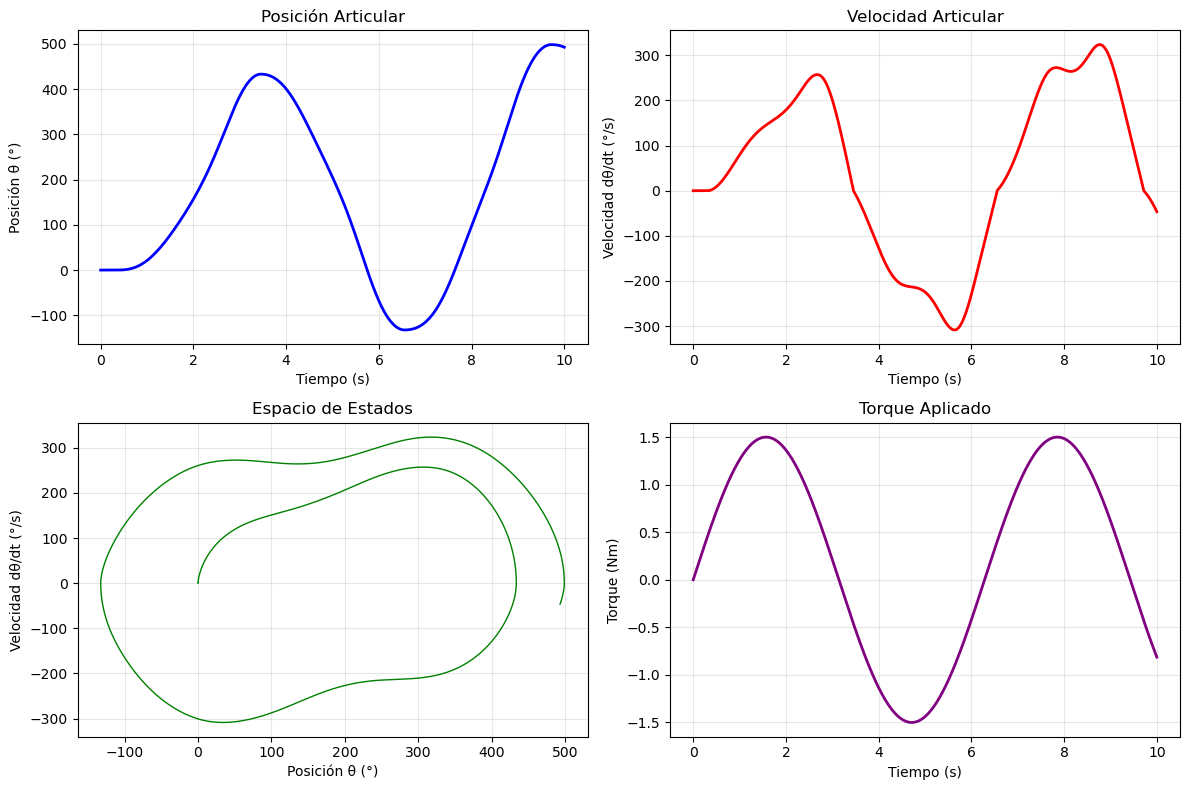

In [8]:
# Celda 4: Crear gráficas
plt.figure(figsize=(12, 8))

# Gráfica de posición
plt.subplot(2, 2, 1)
plt.plot(t, posicion_grados, 'b-', linewidth=2)
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición θ (°)')
plt.title('Posición Articular')
plt.grid(True, alpha=0.3)

# Gráfica de velocidad
plt.subplot(2, 2, 2)
plt.plot(t, velocidad_grados, 'r-', linewidth=2)
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad dθ/dt (°/s)')
plt.title('Velocidad Articular')
plt.grid(True, alpha=0.3)

# Espacio de estados
plt.subplot(2, 2, 3)
plt.plot(posicion_grados, velocidad_grados, 'g-', linewidth=1)
plt.xlabel('Posición θ (°)')
plt.ylabel('Velocidad dθ/dt (°/s)')
plt.title('Espacio de Estados')
plt.grid(True, alpha=0.3)

# Torque aplicado
torque = [1.5 * np.sin(ti) for ti in t]
plt.subplot(2, 2, 4)
plt.plot(t, torque, 'purple', linewidth=2)
plt.xlabel('Tiempo (s)')
plt.ylabel('Torque (Nm)')
plt.title('Torque Aplicado')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()